# Deteksi Status Gizi

## Pustaka Yang Digunakan

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Memuat Data

In [115]:
df = pd.read_excel("/home/rmfarizky/Project/deteksi_stunting/Dataset/new_data.xlsx")

## Detail Information

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NIK                 624 non-null    object 
 1   Nama                624 non-null    object 
 2   JK                  624 non-null    object 
 3   Tgl Lahir           624 non-null    object 
 4   BB Lahir            624 non-null    object 
 5   TB Lahir            624 non-null    object 
 6   Nama Ortu           624 non-null    object 
 7   Prov                624 non-null    object 
 8   Kab/Kota            624 non-null    object 
 9   Kec                 624 non-null    object 
 10  Pukesmas            624 non-null    object 
 11  Desa/Kel            624 non-null    object 
 12  Posyandu            624 non-null    object 
 13  RT                  624 non-null    object 
 14  RW                  624 non-null    object 
 15  Alamat              624 non-null    object 
 16  Usia Saa

## Preprocessing

### Drop unused columns

In [117]:
df = df.drop(columns=['NIK','Nama','Tgl Lahir', 'BB Lahir', 'TB Lahir', 'Nama Ortu', 
                      'Prov', 'Kab/Kota','Kec','Pukesmas','Desa/Kel', 'Posyandu','RT', 'RW', 'Alamat','Naik Berat Badan', 
                      'PMT Diterima (kg)', 'Jml Vit A', 'KPSP','KIA', 'Tanggal Pengukuran'])

### Drop Missing Value

In [118]:
df.dropna(subset=['TB/U','BB/TB'], axis=0, inplace=True)
df.isna().sum()

JK                0
Usia Saat Ukur    0
Berat             0
Tinggi            0
LiLA              0
BB/U              0
ZS BB/U           0
TB/U              0
ZS TB/U           0
BB/TB             0
ZS BB/TB          0
dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 622 entries, 0 to 623
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   JK              622 non-null    object 
 1   Usia Saat Ukur  622 non-null    object 
 2   Berat           622 non-null    float64
 3   Tinggi          622 non-null    float64
 4   LiLA            622 non-null    float64
 5   BB/U            622 non-null    object 
 6   ZS BB/U         622 non-null    float64
 7   TB/U            622 non-null    object 
 8   ZS TB/U         622 non-null    float64
 9   BB/TB           622 non-null    object 
 10  ZS BB/TB        622 non-null    float64
dtypes: float64(6), object(5)
memory usage: 58.3+ KB


In [120]:
df.rename(columns={'Usia Saat Ukur':'usia ukur'}, 
        inplace=True)

In [121]:
df['usia ukur']

0       4 Tahun - 8 Bulan - 0 Hari
1       1 Tahun - 3 Bulan - 0 Hari
2       5 Tahun - 0 Bulan - 0 Hari
3      0 Tahun - 10 Bulan - 0 Hari
4       4 Tahun - 1 Bulan - 0 Hari
                  ...             
619     4 Tahun - 7 Bulan - 7 Hari
620     2 Tahun - 3 Bulan - 3 Hari
621    1 Tahun - 1 Bulan - 20 Hari
622    0 Tahun - 8 Bulan - 21 Hari
623    3 Tahun - 5 Bulan - 25 Hari
Name: usia ukur, Length: 622, dtype: object

## Ganti Unique Value

In [122]:
df['BB/U'].unique()

array(['Berat Badan Normal', 'Kurang', 'Sangat Kurang', 'Risiko Lebih',
       'Lebih', 'Normal'], dtype=object)

In [123]:
# df['BB/U'][[df['BB/U'] == 'Berat Badan Normal']] = 'Normal'

In [128]:
df[df['BB/U'] == 'Berat Badan Normal'] = 'Normal'

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 622 entries, 0 to 623
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JK         622 non-null    object
 1   usia ukur  622 non-null    object
 2   Berat      622 non-null    object
 3   Tinggi     622 non-null    object
 4   LiLA       622 non-null    object
 5   BB/U       622 non-null    object
 6   ZS BB/U    622 non-null    object
 7   TB/U       622 non-null    object
 8   ZS TB/U    622 non-null    object
 9   BB/TB      622 non-null    object
 10  ZS BB/TB   622 non-null    object
dtypes: object(11)
memory usage: 58.3+ KB


### Transformasi Usia Ukur diubah ke format Bulan

In [130]:
def usia_to_months(age_str):
    age_list = age_str.split(' ')
    total_months = int(age_list[0]) * 12 + int(age_list[3])  # Tahun * 12 + Bulan
    return total_months

In [131]:
df['usia ukur'] = df['usia ukur'].apply(usia_to_months)

ValueError: invalid literal for int() with base 10: 'Normal'

In [ ]:
df = df[['JK','usia ukur', 'Berat', 'Tinggi', 'LiLA', 'ZS BB/U', 'ZS TB/U', 'ZS BB/TB', 'BB/U', 'TB/U', 'BB/TB']]

In [ ]:
df.head()

,JK,usia ukur,Berat,Tinggi,LiLA,ZS BB/U,ZS TB/U,ZS BB/TB,BB/U,TB/U,BB/TB
0,L,56,14.3,101.0,14.5,-1.50,-1.97,-0.77,Berat Badan Normal,Normal,Gizi Baik
1,L,15,9.2,74.0,14.4,-1.43,-2.00,-0.50,Berat Badan Normal,Normal,Gizi Baik
2,L,60,12.3,100.0,15.8,-1.37,-1.79,-0.42,Berat Badan Normal,Normal,Gizi Baik
3,L,10,9.0,74.0,15.0,-1.99,-1.99,-1.31,Berat Badan Normal,Normal,Gizi Baik
4,P,49,13.3,97.0,13.6,0.21,-0.94,0.97,Berat Badan Normal,Normal,Gizi Baik


## Exploratory Data Analysis

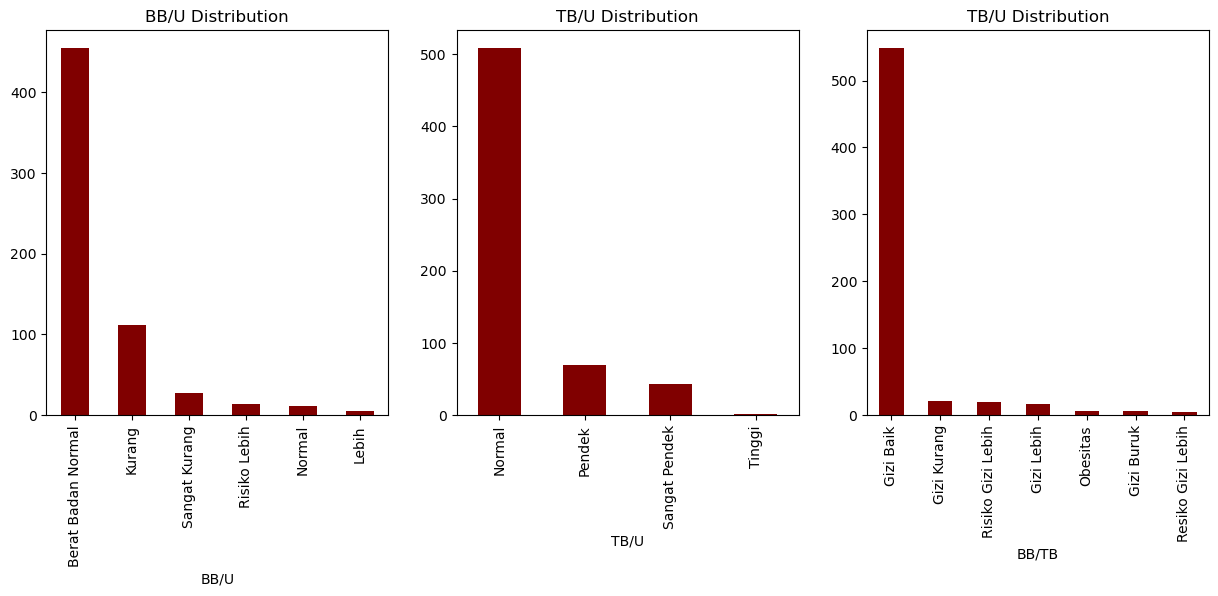

In [ ]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
df['BB/U'].value_counts().plot.bar(color='maroon', ax=axs[0])
axs[0].set_title('BB/U Distribution')

df['TB/U'].value_counts().plot.bar(color='maroon', ax=axs[1])
axs[1].set_title('TB/U Distribution')

df['BB/TB'].value_counts().plot.bar(color='maroon', ax=axs[2])
axs[2].set_title('TB/U Distribution')

plt.show()


### Transformasi Jenis Kelamin

In [ ]:
def Encoded_Col(i_df):
    # Mengurutkan ulang label secara alfabetis
    sorted_labels = sorted(df[i_df].unique())

    # Membuat dictionary untuk menyimpan keterangan encode baru
    encode_labels_new = {}

    # Melakukan encoding ulang dengan label yang berurutan
    for i, label in enumerate(sorted_labels):
        encode_labels_new[label] = i
        df.loc[df[i_df] == label, i_df] = i

    # # Menyimpan data setelah encode ulang
    # df.to_csv('data_encode_ulang.csv', index=False)
    # Menampilkan keterangan encode dan jumlah baris per target setelah encode ulang
    for target_label, target_encode in encode_labels_new.items():
        count_after = df[df[i_df] == target_encode].shape[0]
        print("Target Label:", target_label)
        print("Encode Label:", target_encode)
        print("Jumlah Baris:", count_after)
        print()

In [ ]:
Encoded_Col('JK')

Target Label: L
Encode Label: 0
Jumlah Baris: 8

Target Label: L 
Encode Label: 1
Jumlah Baris: 306

Target Label: P
Encode Label: 2
Jumlah Baris: 14

Target Label: P 
Encode Label: 3
Jumlah Baris: 294



In [ ]:
print(df['BB/U'].unique())
print(df['TB/U'].unique())
print(df['BB/TB'].unique())

['Berat Badan Normal' 'Kurang' 'Sangat Kurang' 'Risiko Lebih' 'Lebih'
 'Normal']
['Normal' 'Pendek' 'Sangat Pendek' 'Tinggi']
['Gizi Baik' 'Gizi Kurang' 'Gizi Lebih' 'Obesitas' 'Risiko Gizi Lebih'
 'Gizi Buruk' 'Resiko Gizi Lebih']


In [ ]:
df['BB/U'][df['BB/U'] == 'Berat Badan Normal'] = 'Normal'

In [ ]:
df.to_csv('clean_new_data.csv', index=False)

## Splitting Data

In [ ]:
X = df[df.columns[:5]]
y = df[df.columns[6]]
X, y = np.array(X), np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                 test_size=0.2, random_state=42)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.5095174185259219
R^2 Score: 0.37650216538067105
